# Plotting

In this quickstart, we'll show all kind of examples. As PySport encourages OpenSource projects, all examples use other sports analytics packages in combination with kloppy. You can find more packages at https://opensource.pysport.org/


## Plotting events using mplsoccer

In this example the [mplsoccer](https://github.com/andrewRowlinson/mplsoccer) package by [Andy Rowlinson](https://twitter.com/numberstorm) is used.


In [1]:
import sys
!{sys.executable} -m pip install mplsoccer matplotlib seaborn

     |████████████████████████████████| 57 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 666 kB/s eta 0:00:01
     |████████████████████████████████| 292 kB 795 kB/s eta 0:00:01
     |████████████████████████████████| 26.9 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 890 kB 630 kB/s eta 0:00:01
     |████████████████████████████████| 59 kB 1.3 MB/s eta 0:00:01
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62945 sha256=16994e8b7249911aca813d3ad2e701c61450199c86ba47a3ceab2c4b4201f639
  Stored in directory: /Users/koen/Library/Caches/pip/wheels/9d/00/80/238af6bc002b4ab5163484f1584ff6b9e795b8b1a33463768d
Successfully built mplsoccer
You should consider upgrading via the '/Users/koen/Developer/Projects/PySport/kloppy/.venv/bin/python -m pip install --upgrade pip' command.


In [3]:
## Load data

from mplsoccer.pitch import Pitch
from kloppy import statsbomb

dataset = statsbomb.load_open_data(
    event_types=["pass"], 
    coordinates="statsbomb"
)

home_team, away_team = dataset.metadata.teams

messi = home_team.players[9]
print(f"Going to show passes of: {messi}")

Going to show passes of: Lionel Andrés Messi Cuccittini


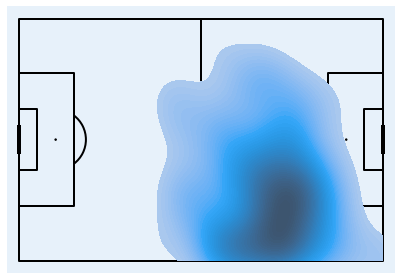

In [4]:
df = (
    dataset
    .filter(lambda event: event.player == messi)
    .to_pandas()
)


pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, ax = pitch.draw()
plot = pitch.kdeplot(
    df["coordinates_x"],
    df["coordinates_y"],
    ax=ax,
    shade=True,
    n_levels=50,
)